# TASK 1

In [1]:
import pandas as pd
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv",sep=',')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1.1 Create a pie chart presenting the male/female proportion

In [2]:
var=titanic.groupby(['sex'])['sex'].count()
femalepercent = ((var['female'])*100)/(var['female']+var['male'])
print(femalepercent)
malepercent = ((var['male'])*100)/(var['female']+var['male'])
print(malepercent)

35.59969442322384
64.40030557677616


sex
female    466
male      843
Name: sex, dtype: int64


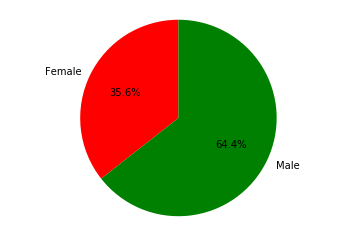

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
pie_chart=titanic.groupby(titanic['sex'])['sex'].count()
print(pie_chart)
labels=['Female','Male']
color = ['r','g']
plt.pie(pie_chart, labels=labels, colors=color, startangle=90, shadow= False, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

1.2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

Text(0,0.5,'FARE')

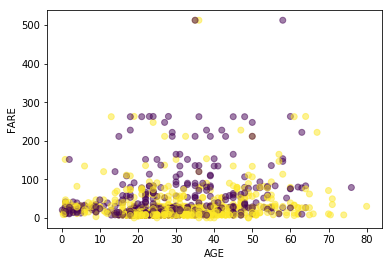

In [4]:
import matplotlib.pyplot as plt
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=pd.factorize(titanic['sex'])[0])
plt.xlabel("AGE")
plt.ylabel("FARE")

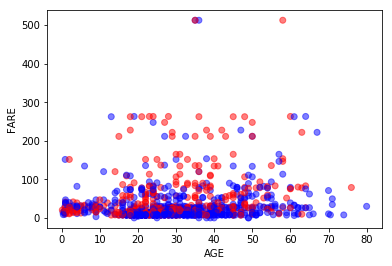

In [5]:
import matplotlib.pyplot as plt
titanic1 = titanic.dropna(subset=['sex'])
mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic1['age'], titanic1['fare'], alpha=0.5, c=titanic1['sex'].map(mapping))
plt.xlabel("AGE")
plt.ylabel("FARE")
plt.show()

# TASK 2

In [6]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
print(df)

               Airline  FlightNumber           From_To  RecentDelays
0               KLM(!)       10045.0      LoNDon_paris      [23, 47]
1    <Air France> (12)           NaN      MAdrid_miLAN            []
2  (British Airways. )       10065.0  londON_StockhOlm  [24, 43, 87]
3       12. Air France           NaN    Budapest_PaRis          [13]
4          "Swiss Air"       10085.0   Brussels_londOn      [67, 32]


2.1 Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).

In [7]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045,LoNDon_paris,"[23, 47]"
1,<Air France> (12),10055,MAdrid_miLAN,[]
2,(British Airways. ),10065,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,10075,Budapest_PaRis,[13]
4,"""Swiss Air""",10085,Brussels_londOn,"[67, 32]"


2.2 The From_To column would be better as two separate columns! Split each string on the
underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
correct column names to this temporary DataFrame.

In [8]:
df1 = pd.DataFrame(df.From_To)
df1['From'] = df1.From_To.str.split('_').str.get(0)
df1['To'] = df1.From_To.str.split('_').str.get(1)
df1 = df1.drop('From_To', 1)
df1

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


2.3 Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
"London".)

In [9]:
df1['From'] = df1.From.str.title()
df1['To'] = df1.To.str.title()
df1

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


2.4 Delete the From_To column from df and attach the temporary DataFrame from the previous
questions.

In [10]:
df = df.drop('From_To', 1)
df = pd.concat([df1,df], axis = 1)
df

,From,To,Airline,FlightNumber,RecentDelays
0,London,Paris,KLM(!),10045,"[23, 47]"
1,Madrid,Milan,<Air France> (12),10055,[]
2,London,Stockholm,(British Airways. ),10065,"[24, 43, 87]"
3,Budapest,Paris,12. Air France,10075,[13]
4,Brussels,London,"""Swiss Air""",10085,"[67, 32]"


2.5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [11]:
tDelay = pd.DataFrame(df.RecentDelays)
tDelay = pd.DataFrame(df['RecentDelays'].values.tolist())
tDelay.columns = ['Delay_1', 'Delay_2', 'Delay_3']
df = df.drop('RecentDelays', 1)
df.insert(3, "Delay_1", tDelay['Delay_1'])
df.insert(4, "Delay_2", tDelay['Delay_2'])
df.insert(5, "Delay_3", tDelay['Delay_3'])
df

,From,To,Airline,Delay_1,Delay_2,Delay_3,FlightNumber
0,London,Paris,KLM(!),23.0,47.0,NaN,10045
1,Madrid,Milan,<Air France> (12),NaN,NaN,NaN,10055
2,London,Stockholm,(British Airways. ),24.0,43.0,87.0,10065
3,Budapest,Paris,12. Air France,13.0,NaN,NaN,10075
4,Brussels,London,"""Swiss Air""",67.0,32.0,NaN,10085
